<a href="https://colab.research.google.com/github/ant9398/Personnal/blob/Titanic-ML/Titanic_EDA_%2B_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [13]:
url = 'https://raw.githubusercontent.com/ant9398/Personnal/Titanic-ML/train.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [61]:
url = 'https://raw.githubusercontent.com/ant9398/Personnal/Titanic-ML/test.csv'
submitset = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

### Variable Notes ###
**pclass**: A proxy for socio-economic status (SES):

    -1st = Upper
    -2nd = Middle
    -3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: number of siblings/spouse aboard

**parch**: number of parents/children aboard

In [14]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

#### Global Analysis:

*   **Target**: Survived 
*   **Shape**: 891 rows and 11 columns
*   **Variable types**: 5 qualitatives, 6 quantitatives
*   **Missing Values Analysis**: 

    - 8 complete variables
    - 2 variables with >20% missing data 
    - 'Cabin' has 77% missing data

#### In-Depth Analysis:

*   **Target Visualisation**: 38% of survivors
*   **Variables Meaning**: 

    - Name and Ticket are ID variables; they wil be dropped
    - 'Fare' has right-skewed distribution
    - 72% of passengers have Southampton as port of embarkation
*   **Target/pclass**: Apparently, people from the lower class had way less chances to survive than the others
*   **Target/family on board**: it also seems like that people that were alone on the Titanic had less chances to survive than people with atleast a family member aboard
*   **Target/Sex**: It seems like women were highly prioritized during rescue
*   **Target/Embarked**: It seems like people who embarked at Southampton had higher chance of dieing from the naufrage. Maybe relation between Embarked/Sex?
*   **Cabin**: Initially, lots of missing data in the variable and cabin numbers for the rest, hard to interpret. We created 'Cabin_info' which indicates if the cabin number is known for the passenger, and we observe that people with unknown cabin number have higher survival rate in the train set



















## Global Analysis

In [16]:
df = data.copy()

In [17]:
df.shape

(891, 11)

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [19]:
df.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

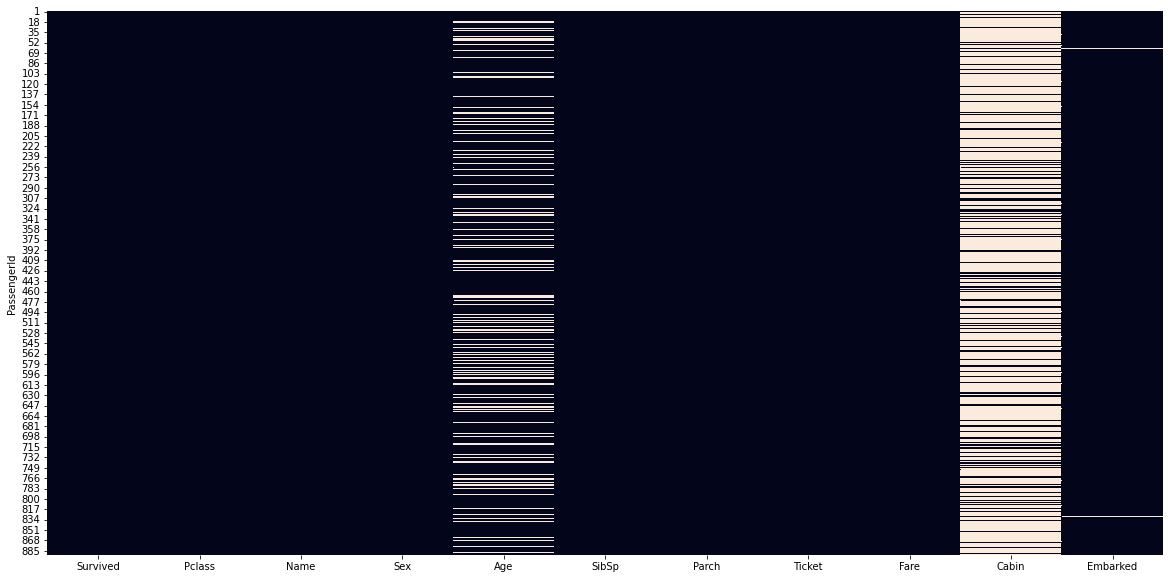

In [20]:
#white area is missing data
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [21]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64

## In-Depth Analysis

In [22]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
float_columns =df.columns[df.dtypes=='float']
df.dtypes.reset_index()

,index,0
0,Survived,int64
1,Pclass,int64
2,Name,object
3,Sex,object
4,Age,float64
5,SibSp,int64
6,Parch,int64
7,Ticket,object
8,Fare,float64
9,Cabin,object


In [23]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

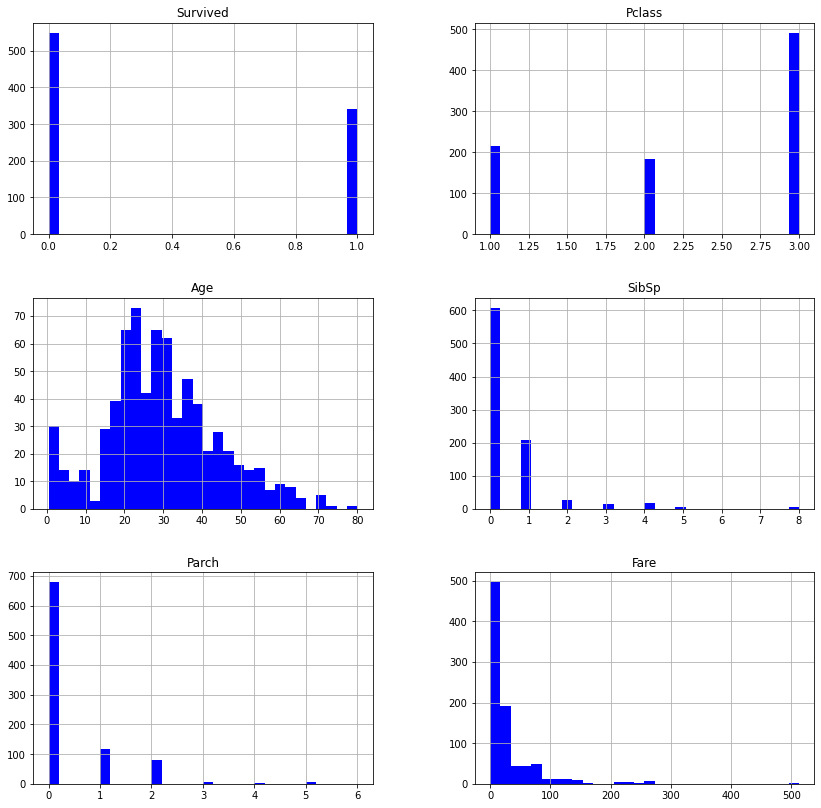

In [24]:
df.hist(bins = 30, figsize = (14,14), color = 'b');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


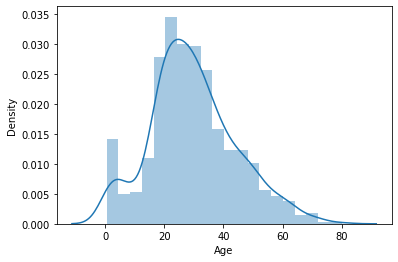

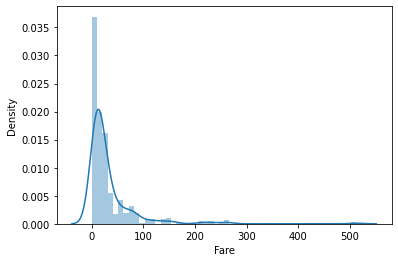

In [25]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [26]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Name---------------------------------------------- ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles A

In [27]:
#for cat in categorical:
#  if (cat != 'Id'):
#    sn.countplot(data = df, x = cat)
#    plt.xticks(rotation=30)
#    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


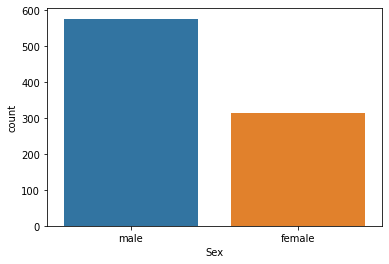

In [28]:
sns.countplot(df['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


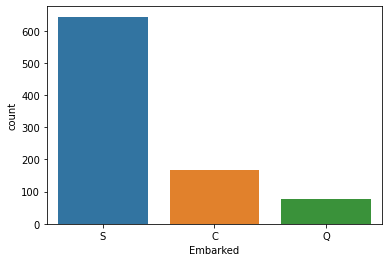

In [29]:
sns.countplot(df['Embarked'])

In [30]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

### Target/Variables Relation

In [31]:
survived_df = df[df['Survived'] == 1]
died_df = df[df['Survived'] == 0]
ticket_na = df[pd.isnull(df['Ticket'])]
ticket_notna = df[pd.notnull(df['Ticket'])]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

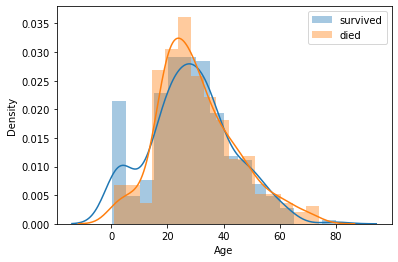

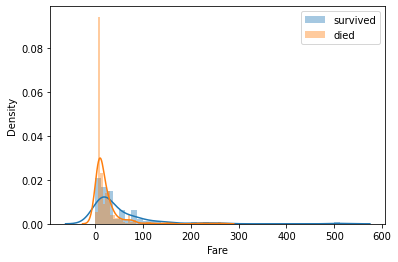

In [32]:
#check for continuous variables
for col in df.select_dtypes('float'): 
  plt.figure()
  sns.distplot(survived_df[col], label='survived')
  sns.distplot(died_df[col], label='died')
  plt.legend()

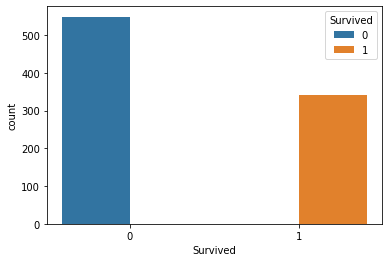

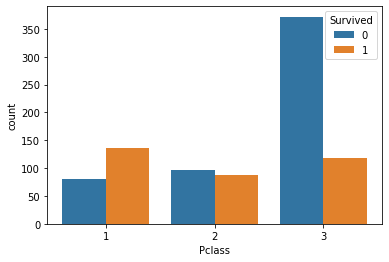

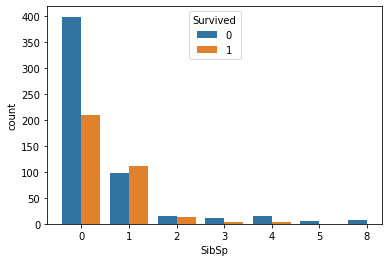

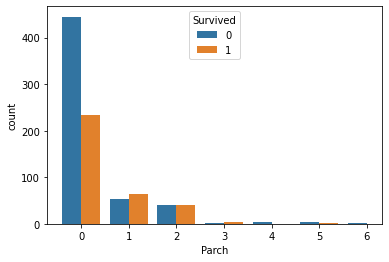

In [33]:
#for discrete variables
for col in df.select_dtypes('int'): 
  plt.figure()
  sns.countplot(x=col, hue='Survived', data=df)
  plt.plot()

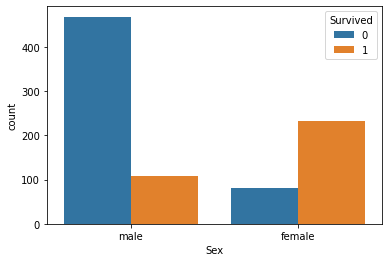

In [34]:
sns.countplot(x='Sex', hue='Survived', data=df)

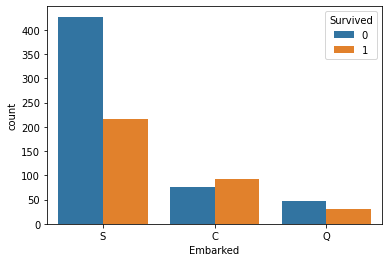

In [35]:
sns.countplot(x='Embarked', hue='Survived', data=df)

In [36]:
#sns.pairplot(df[float_columns])

### Corellations

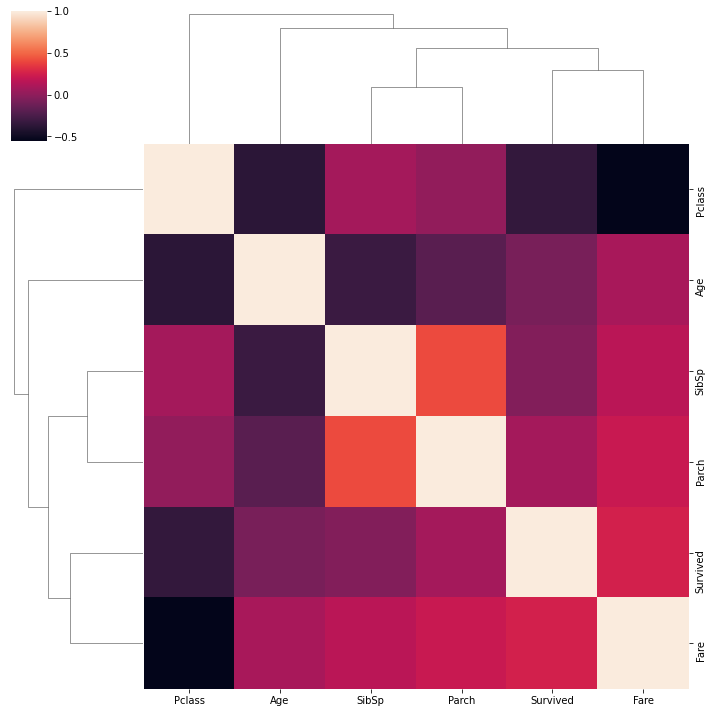

In [37]:
sns.clustermap(df.corr())

Nothing much to say, except from the fact that there is some corellation between 'Parch' and 'SibSp' which is completely logical

### Sex/Embarked

In [38]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


Did most men from Southampton died?

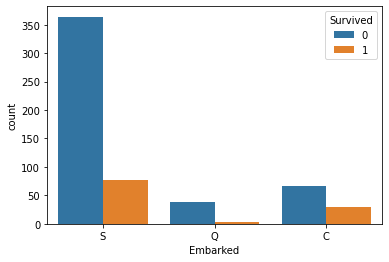

In [39]:
male_df = df[df['Sex']=='male']
sns.countplot(x='Embarked', hue='Survived', data=male_df)

### Variable Cabin


In [49]:
def cabininfo(df):
  if pd.isnull(df['Cabin']):
    return 'inconnu'
  else:
    return 'connu'  

In [50]:
df['Cabin_info'] = df.apply(cabininfo, axis=1)

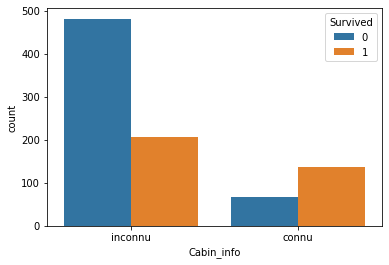

In [51]:
sns.countplot(x='Cabin_info', hue='Survived', data=df)

# Pre-Processing

### Drop certain variables

In [57]:
df = df.drop(columns=['Name','Ticket','Cabin'])

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_info
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,inconnu
2,1,1,female,38.0,1,0,71.2833,C,connu
3,1,3,female,26.0,0,0,7.9250,S,inconnu
4,1,1,female,35.0,1,0,53.1000,S,connu
5,0,3,male,35.0,0,0,8.0500,S,inconnu


### TrainTest - Cleaning - Encoding

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [62]:
trainset['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [63]:
testset['Survived'].value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

### Evaluation procedure

### Modelling


### Optimization


### Precision Recall curve